# Побудова моделі


<h2>Мета</h2>

Ознайомитись з різновидами регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Будувати регресійні моделі кількох видів
* Оцінювати якість моделі візуально
* Оцінювати якість моделі за допомогою числових мір, без використання тестової вибірки
* Виконувати прогнозування відгуку, використовуючи побудовану модель



<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>

1. Скачати дані із файлу "clean_data2.csv" (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.
2. Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.
3. Побудуйте кілька поліноміальних моделей другого порядку.
4. Побудуйте візуалізації для оцінки всіх моделей.
5. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.


<a name="task1"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Скачати дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Записати дані у dataframe. </p><p>В попередній роботі ви визначили ознаки, що можуть бути предикторами для 'CO2 emission'. Побудуйте моделі лінійної регресії для кожного з цих предикторів.</p>
</div>

Імпортую бібліотеки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from termcolor import colored
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

Зчитую дані з файлу у датафрейм


In [3]:
df = pd.read_csv("../Data2-clean.csv", sep=';' ,encoding='cp1252')
df

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0,17.048902
3,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0,164.427660
4,Angola,Sub-Saharan Africa,3308.700233,28813463.0,34763.160,1246700.0,23.111786
...,...,...,...,...,...,...,...
178,Vanuatu,East Asia & Pacific,2860.566475,270402.0,154.014,12190.0,22.182281
179,Vietnam,East Asia & Pacific,2170.648054,92701100.0,166910.839,330967.0,280.091671
180,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730,527970.0,52.245796
181,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076,752610.0,22.045136


З попередньої роботи знаємо, що хорошими показниками для `CO2 emission` можуть бути:
- `Population`.
- `Area`.

Розробимо моделі, використовуючи ці ознаки як змінні-предиктори.

Створюю об’єкт лінійної регресії та навчаю першу (`Population`) модель

In [4]:
x_p = df[['Population']]
x_a = df[['Area']]
y = df['CO2 emission']

model_1 = LinearRegression()
model_1.fit(x_p, y)

Yhat1 = model_1.predict(x_p)
Yhat1

array([ 1.58214516e+05,  4.03076403e+03,  1.87081678e+05, -9.54801216e+03,
        1.29868665e+05, -9.43311639e+03,  2.02807572e+05,  4.26711009e+03,
        1.07132557e+05,  3.25157987e+04,  3.74397728e+04, -8.02484512e+03,
       -3.00857888e+03,  7.80654066e+05, -8.54026050e+03,  3.62018657e+04,
        4.51338644e+04, -8.14263245e+03,  4.28251736e+04, -6.05250656e+03,
        4.29007810e+04,  7.13926174e+03,  9.94429119e+02,  9.97527254e+05,
       -7.86976834e+03,  2.46584456e+04,  8.05422255e+04,  4.11359360e+04,
       -7.30521588e+03,  6.65498837e+04,  1.03794797e+05,  1.66124543e+05,
        1.23683486e+04,  6.01951172e+04,  7.69681481e+04,  6.67881854e+06,
        2.26124345e+05, -6.06300544e+03,  3.72073963e+05,  1.49455225e+04,
        1.36426379e+04,  1.05040350e+05,  1.03111651e+04, -4.24596198e+03,
        4.13179489e+04,  1.78821860e+04, -9.56614746e+03,  4.17408053e+04,
        6.95709700e+04,  4.54320976e+05,  2.08591518e+04, -3.99675916e+03,
       -3.53590011e+03,  

Знаходжу коефіцієнти моделі


In [5]:
print(f"coefficient: {colored(model_1.coef_, 'green')}")
print(f"interception point: {colored(model_1.intercept_, 'blue')}")

coefficient: [0.00485161]
interception point: -9922.949236649234


Отримали кінцеву лінійну модель зі структурою:

$$
Yhat1 = -9922.9492 + 0.00485 \cdot `Population`
$$

Підставляючи фактичні значення, маємо:

In [6]:
test_population = 1e9

model_1.predict([[test_population]])
predicted_co2_m1 = model_1.predict([[test_population]])[0]
predicted_co2_m1

C:\Users\local_gud2i5y\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\local_gud2i5y\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4841684.578578547

Створюю об’єкт лінійної регресії та навчаю другу модель


In [7]:
model_2 = LinearRegression()
model_2.fit(x_a, y)

Yhat2 = model_2.predict(x_a)
Yhat2

array([ 1.69753080e+05,  6.16484104e+03,  6.22917481e+05, -1.24775513e+03,
        3.25407115e+05, -1.25561857e+03,  7.27412021e+05,  6.42433433e+03,
        2.02771454e+06,  2.06149476e+04,  2.13281610e+04,  2.26719942e+03,
       -1.16885869e+03,  3.73250049e+04, -1.25823971e+03,  5.30440074e+04,
        6.63140473e+03,  4.64981961e+03,  2.87093034e+04,  8.69267263e+03,
        2.86582725e+05,  1.20519312e+04,  1.51108880e+05,  2.23073528e+06,
        1.41451362e+02,  2.77237532e+04,  7.05060710e+04,  5.92369576e+03,
       -3.14627752e+02,  4.60822481e+04,  1.23248737e+05,  2.61575517e+06,
        1.61921101e+05,  3.35183983e+05,  1.96812726e+05,  2.50520605e+06,
        2.97897943e+05, -8.83153958e+02,  6.13250701e+05,  8.82721872e+04,
        1.20230986e+04,  8.31504712e+04,  1.34621069e+04,  1.05360959e+03,
        1.93020164e+04,  9.87952679e+03, -1.17436309e+03,  1.13861605e+04,
        6.58273283e+04,  2.61123550e+05,  4.14393876e+03,  5.98136093e+03,
        1.04844869e+04,  

Знаходжу коефіцієнти моделі


In [8]:
print(f"coefficient: {colored(model_2.coef_, 'green')}")
print(f"interception point: {colored(model_2.intercept_, 'blue')}")

coefficient: [0.26211443]
interception point: -1370.948918094975


Отримали кінцеву лінійну модель зі структурою:

$$
Yhat2 = 1370.9489 + 0.26211443 \cdot `Area`
$$

Підставляючи фактичні значення, маємо:


In [9]:
test_area = 0.5e7

model_2.predict([[test_area]])
predicted_co2_m2 = model_2.predict([[test_area]])[0]
predicted_co2_m2

C:\Users\local_gud2i5y\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\local_gud2i5y\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1309201.2172565707

<a name="task2"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Побудуйте модель множинної лінійної регресії для всіх доречних предикторів разом.</p>
</div>

Створюю об’єкт лінійної регресії та навчаю множинну лінійну модель із структурою

$$
Yhat3 = -68459.37215735792 + 0.00408196 \cdot `Population` + 0.12675393 \cdot `Area`
$$

In [10]:
x = df[['Population', 'Area']]

model_3 = LinearRegression()
model_3.fit(x, y)

Yhat3 = model_3.predict(x)
Yhat3

array([ 1.55757671e+05, -5.30750728e+04,  3.99187744e+05, -6.80843400e+04,
        2.07180105e+05, -6.79914737e+04,  4.62950636e+05, -5.27507339e+04,
        1.01125677e+06, -2.21210302e+04, -1.76332882e+04, -6.51030349e+04,
       -6.25441566e+04,  6.15414749e+05, -6.72415262e+04, -3.33759018e+03,
       -1.82668652e+04, -6.40499435e+04, -9.53282600e+03, -6.03363383e+04,
        1.15233842e+05, -4.76128077e+04,  1.44626607e+04,  1.85857826e+06,
       -6.60005336e+04, -2.52942149e+04,  4.24130495e+04, -2.19728057e+04,
       -6.57460925e+04,  1.88294937e+04,  8.74823051e+04,  1.34525649e+06,
        2.92608438e+04,  1.53287353e+05,  1.00485635e+05,  6.77132996e+06,
        2.74863022e+05, -6.49758732e+04,  5.50158533e+05, -4.18614038e+03,
       -4.21550573e+04,  6.91394494e+04, -4.42621527e+04, -6.25104971e+04,
       -1.53501462e+04, -3.96246564e+04, -6.80641073e+04, -1.88223397e+04,
        3.09196946e+04,  4.49075540e+05, -3.98935801e+04, -5.99178533e+04,
       -5.73524715e+04,  

Знаходжу коефіцієнти моделі


In [11]:
print(f"coefficient: {colored(model_3.coef_, 'green')}")
print(f"interception point: {colored(model_3.intercept_, 'blue')}")

coefficient: [0.00408196 0.12675393]
interception point: -68459.37215735792


Підставляючи фактичні значення, маємо:

In [12]:
model_3.predict([[test_population, test_area]])
predicted_co2_m3 = model_3.predict([[test_population, test_area]])[0]
predicted_co2_m3

C:\Users\local_gud2i5y\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\local_gud2i5y\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4647268.381848969

<a name="task3"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудуйте кілька поліноміальних моделей другого порядку.</p>
</div>

Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою

$$
Yhat4 = - 2.149 \cdot 10^{4} + 0.005384 \cdot `Population` - 4.224 \cdot 10^{-13} \cdot `Population`^2  
$$

In [13]:
f4 = np.polyfit(df['Population'], df['CO2 emission'], 2)
p4 = np.poly1d(f4)
p4(test_population)

4939878.49945833

Знаходжу коефіцієнти моделі


In [14]:
print(p4)

            2
-4.224e-13 x + 0.005384 x - 2.149e+04


Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою

$$
Yhat5 = -68883.26503891358 + 4.60675779 \cdot 10^{-1} \cdot `Area` - 1.65261389 \cdot 10^{-8} \cdot `Area`^2
$$

In [15]:
f5 = np.polyfit(df['Area'], df['CO2 emission'], 2)
p5 = np.poly1d(f5)
p5(test_area)

1821342.154418972

Знаходжу коефіцієнти моделі


In [16]:
print(p5)

            2
-1.653e-08 x + 0.4607 x - 6.888e+04


Створюю об’єкт поліноміальної регресії та навчаю поліноміальну модель із структурою

$$
Yhat6 = 2367.3231821453373 + 2.35469535 \cdot 10^{-3} \cdot `Population` + 2.74701507 \cdot 10^{-2} \cdot `Area` \\ - 3.16730279 \cdot 10^{-12} \cdot `Population` \cdot `Area` + 1.01806703 \cdot 10^{-9} \cdot `Population`^2 - 4.46783405 \cdot 10^{-9} \cdot `Area`^2
$$

In [17]:
Input = [('scale', StandardScaler()), 
         ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), 
         ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x, y)

ypipe = pipe.predict(x)
ypipe

array([1.19231819e+05, 9.98369387e+03, 2.31302305e+05, 2.56219622e+03,
       1.31458295e+05, 2.61713103e+03, 2.65480082e+05, 1.01288183e+04,
       1.92394653e+05, 2.57420224e+04, 2.82587258e+04, 3.67399586e+03,
       5.73900145e+03, 3.30415813e+05, 3.05005266e+03, 3.19869795e+04,
       2.98680880e+04, 3.86814678e+03, 3.19577337e+04, 5.32305885e+03,
       6.45928166e+04, 1.21875334e+04, 2.34508819e+04, 2.06495547e+06,
       3.52406552e+03, 2.27898514e+04, 5.75752397e+04, 2.78567997e+04,
       3.74971838e+03, 4.64278947e+04, 7.92151046e+04, 2.81359988e+05,
       3.14128086e+04, 8.25351547e+04, 7.55254198e+04, 1.05049197e+07,
       1.91527208e+05, 4.29130227e+03, 3.95940418e+05, 2.50107456e+04,
       1.53747205e+04, 7.25580405e+04, 1.39132038e+04, 5.38298255e+03,
       2.98702459e+04, 1.71795803e+04, 2.56110545e+03, 2.89368260e+04,
       5.11242237e+04, 3.19272116e+05, 1.78915828e+04, 6.04071087e+03,
       6.75567304e+03, 3.50295826e+05, 4.99814825e+03, 2.58889396e+04,
      

Знаходжу коефіцієнти моделі


In [18]:
print(f"coefficient: {colored(pipe.named_steps['model'].coef_, 'green')}")
print(f"interception point: {colored(pipe.named_steps['model'].intercept_, 'blue')}")

coefficient: [409749.22941313 121284.82415744 -66927.69067616 291103.03583485
 -17287.0721734 ]
interception point: 136537.42783411834


<a name="task4"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте візуалізації для оцінки всіх моделей.</p>
</div>

Для простої лінійної регресії чудовим способом візуалізації відповідності моделі є використання графіків регресії. Цей графік покаже комбінацію розсіяних точок даних (діаграма розсіювання, scatterplot) та підігнану лінію лінійної регресії, що проходить через дані.

Таким способом візуалізую перші моделі.


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

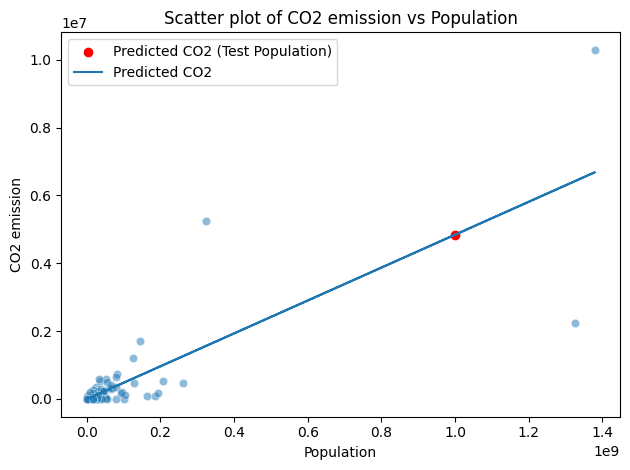

In [20]:
sns.scatterplot(data=df, x='Population', y='CO2 emission', alpha=0.5)
plt.scatter(x=test_population, y=predicted_co2_m1, color='red', marker='o', label='Predicted CO2 (Test Population)')
plt.plot(df['Population'], Yhat1, label='Predicted CO2')
plt.title(f'Scatter plot of CO2 emission vs Population')
plt.legend()
plt.tight_layout()

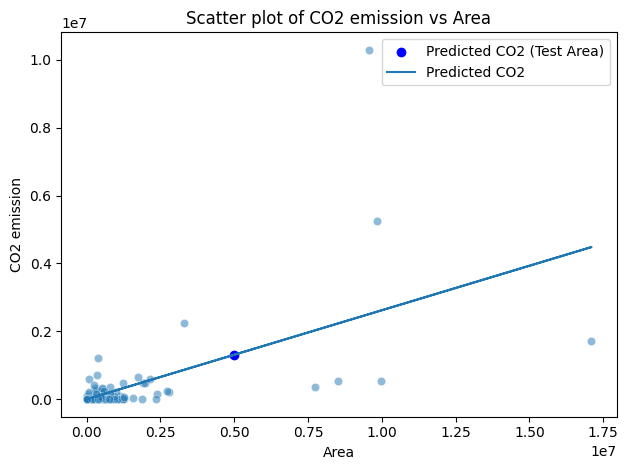

In [21]:
sns.scatterplot(data=df, x='Area', y='CO2 emission', alpha=0.5)
plt.scatter(x=test_area, y=predicted_co2_m2, color='blue', marker='o', label='Predicted CO2 (Test Area)')
plt.plot(df['Area'], Yhat2, label='Predicted CO2')
plt.title(f'Scatter plot of CO2 emission vs Area')
plt.legend()
plt.tight_layout()

Для візуалізації дисперсії даних використаю діаграми залишків - по ній зможу прийняти рішення про необхідність ускладнення моделі.


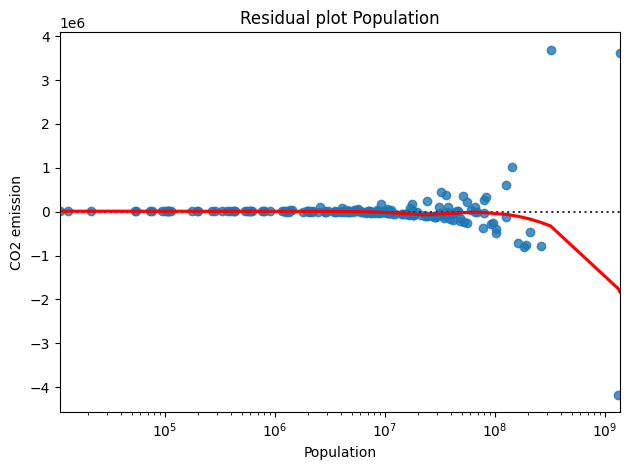

In [63]:
sns.residplot(data=df, x='Population', y='CO2 emission', lowess=True, line_kws={'color': 'red'})
plt.title('Residual plot Population')
plt.xscale('log')

plt.tight_layout()

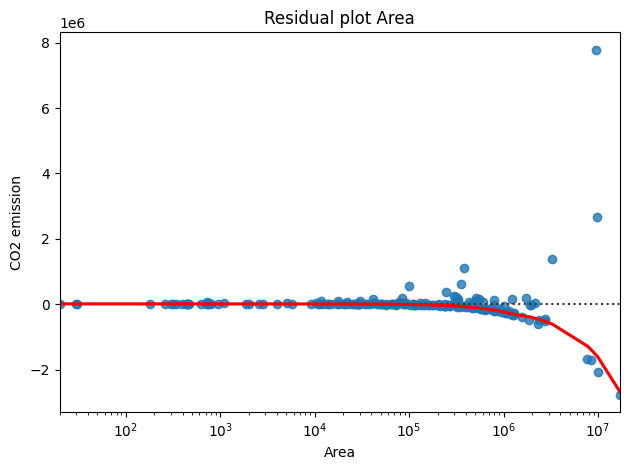

In [61]:
sns.residplot(data=df, x='Area', y='CO2 emission', lowess=True, line_kws={'color': 'red'})
plt.title('Residual plot Area')
plt.xscale('log')

plt.tight_layout()

Для візуалізації моделі множинної лінійної регресії використаю діаграму розподілу.


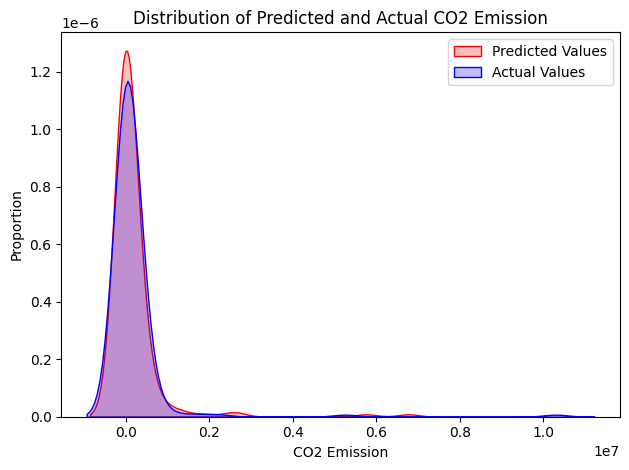

In [24]:
sns.kdeplot(x=Yhat3, fill=True, color='r', label='Predicted Values')
sns.kdeplot(x=df['CO2 emission'], fill=True, color='b', label='Actual Values')

plt.title('Distribution of Predicted and Actual CO2 Emission')
plt.xlabel('CO2 Emission')
plt.ylabel('Proportion')
plt.legend()
# plt.xscale('log')
plt.tight_layout()

Для візуалізації поліноміальних моделей з одним предиктором використаю функцію `poly1d`. Зручно розміщувати всі моделі на одному графіку для обрання найкращої.

In [25]:
x_range_population = np.linspace(df['Population'].min(), df['Population'].max(), 100)
x_range_area = np.linspace(df['Area'].min(), df['Area'].max(), 100)

y_values_p4 = p4(x_range_population)
y_values_p5 = p5(x_range_area)

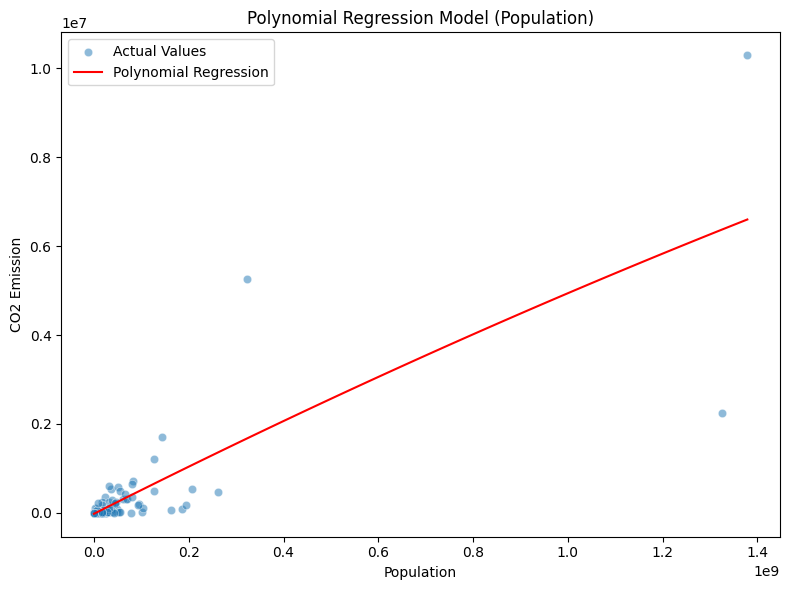

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Population', y='CO2 emission', label='Actual Values', alpha=0.5)
plt.plot(x_range_population, y_values_p4, 'r-', label='Polynomial Regression')
plt.title('Polynomial Regression Model (Population)')
plt.xlabel('Population')
plt.ylabel('CO2 Emission')
plt.legend()
plt.tight_layout()

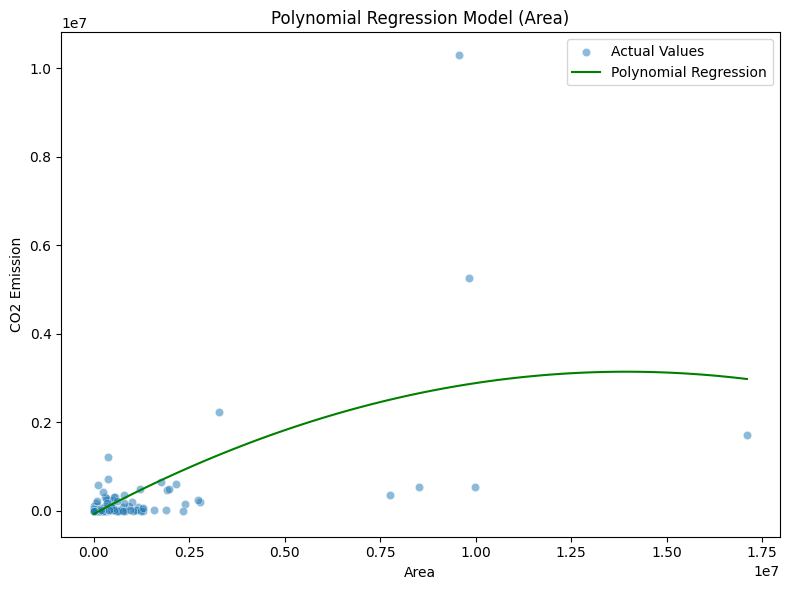

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Area', y='CO2 emission', label='Actual Values', alpha=0.5)
plt.plot(x_range_area, y_values_p5, 'g-', label='Polynomial Regression')
plt.title('Polynomial Regression Model (Area)')
plt.xlabel('Area')
plt.ylabel('CO2 Emission')
plt.legend()
plt.tight_layout()

Для візуалізації поліноміальних моделей з кількома предикторами використаю діаграму розподілу або діаграму залишків


In [1]:
sns.kdeplot(x=ypipe, fill=True, color='r', label='Predicted Values')
sns.kdeplot(x=df['CO2 emission'], fill=True, color='b', label='Actual Values')

plt.title('Distribution of Predicted and Actual CO2 Emission')
plt.xlabel('CO2 Emission')
plt.ylabel('Proportion')
plt.legend()
plt.xscale('log')
plt.tight_layout()

NameError: name 'sns' is not defined

<a name="task5"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Порахуйте значення R^2 та MSE для оцінки якості кожної моделі. Оберіть найкращу модель.</p>
</div>

Значення R^2 отримую безпосередньо з моделі <code>.score(X, Y)</code>, а для розрахунку MSE спочатку формую прогнозовані значення <code>.predict(X)</code> і порівнюю їх з фактичними


Модель 1:
$$
Yhat1 = a + b  X
$$


In [29]:
mse = mean_squared_error(y_true=y, y_pred=Yhat1)
score = model_1.score(x_p, y)

print(f"R-square: {colored(f'{score:.4e}', 'green')}")
print(f"MSE of actual and predicted values: {colored(f'{mse:.4e}', 'blue')}")

R-square: 6.4481e-01
MSE of actual and predicted values: 2.7398e+11


Модель 2:
$$
Yhat2 = a + b  X
$$

In [30]:
mse = mean_squared_error(y_true=y, y_pred=Yhat2)
score = model_2.score(x_a, y)

print(f"R-square: {colored(f'{score:.4e}', 'green')}")
print(f"MSE of actual and predicted values: {colored(f'{mse:.4e}', 'blue')}")

R-square: 3.4463e-01
MSE of actual and predicted values: 5.0552e+11


Модель 3:
$$
Yhat3 = a + b_1 X_1 + b_2 X_2
$$

In [31]:
mse = mean_squared_error(y_true=y, y_pred=Yhat3)
score = model_3.score(x, y)

print(f"R-square: {colored(f'{score:.4e}', 'green')}")
print(f"MSE of actual and predicted values: {colored(f'{mse:.4e}', 'blue')}")

R-square: 7.0918e-01
MSE of actual and predicted values: 2.2433e+11


Модель 4:
$$
Yhat4 = a + b_1 X_1 + b_2 X_1^2  
$$

In [32]:
from sklearn.metrics import r2_score

mse = mean_squared_error(y_true=y, y_pred=p4(x_p))
score = r2_score(y_true=y, y_pred=p4(x_p))

print(f"R-square: {colored(f'{score:.4e}', 'green')}")
print(f"MSE of actual and predicted values: {colored(f'{mse:.4e}', 'blue')}")


R-square: 6.4542e-01
MSE of actual and predicted values: 2.7351e+11


Модель 5:
$$
Yhat5 = a + b_1 X_2 + b_2 X_2^2
$$

In [33]:
mse = mean_squared_error(y_true=y, y_pred=p5(x_a))
score = r2_score(y_true=y, y_pred=p5(x_a))

print(f"R-square: {colored(f'{score:.4e}', 'green')}")
print(f"MSE of actual and predicted values: {colored(f'{mse:.4e}', 'blue')}")


R-square: 3.7686e-01
MSE of actual and predicted values: 4.8066e+11


Модель 6:
$$
Yhat6 = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

In [34]:
mse = mean_squared_error(y_true=y, y_pred=ypipe)
score = r2_score(y_true=y, y_pred=ypipe)

print(f"R-square: {colored(f'{score:.4e}', 'green')}")
print(f"MSE of actual and predicted values: {colored(f'{mse:.4e}', 'blue')}")

R-square: 9.3788e-01
MSE of actual and predicted values: 4.7920e+10


#### Висновок

Порівнюючи всі моделі, роблю висновок, що **модель #6, поліноміальна множинна регресія, - є найкращою моделлю** для прогнозування `CO2 emission` на основі нашого набору даних. Ця модель має найвищий коефіцієнт детермінації $0.93788$ та найменшу середньоквадратичну похибку $4.7920 \cdot 10^{10}$.

<a name="task6"></a>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Побудуйте та оцініть кілька поліноміальних моделей різних порядків.</p>
</div>

1. Побудуйте кілька поліноміальних моделей різних порядків.
2. Побудуйте візуалізації для оцінки всіх моделей (зручно розміщувати всі моделі на одному графіку для обрання найкращої).
3. Порахуйте значення R^2 та MSE для оцінки якості кожної моделі (теж доцільно побудувати графік залежності R^2 або MSE від порядку поліному моделі). Оберіть найкращу модель.


1. Будую поліноміальну модель 3 та 4 порядків

In [64]:
Input_3 = [('scale', StandardScaler()), 
         ('polynomial', PolynomialFeatures(degree=3, include_bias=False)), 
         ('model', LinearRegression())]
pipe_3 = Pipeline(Input_3)
pipe_3.fit(x, y)

Input_4 = [('scale', StandardScaler()), 
         ('polynomial', PolynomialFeatures(degree=10, include_bias=False)), 
         ('model', LinearRegression())]
pipe_4 = Pipeline(Input_4)
pipe_4.fit(x, y)

ypipe_3 = pipe_3.predict(x)
ypipe_4 = pipe.predict(x)

2. Створюю візуалізацію для оцінки всіх моделей

Діаграми розподілу спостережень

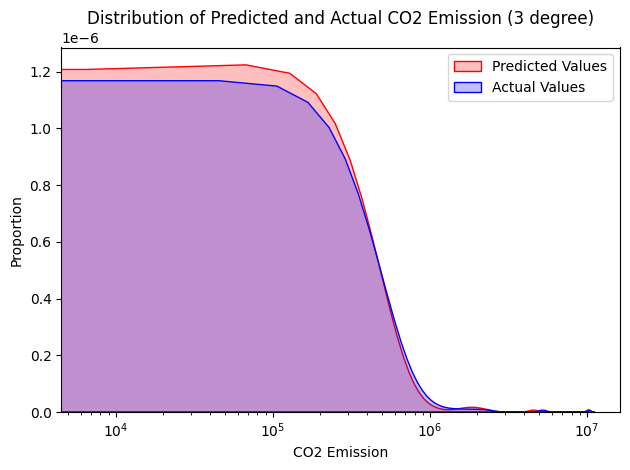

In [36]:
sns.kdeplot(x=ypipe_3, fill=True, color='r', label='Predicted Values')
sns.kdeplot(x=df['CO2 emission'], fill=True, color='b', label='Actual Values')

plt.title('Distribution of Predicted and Actual CO2 Emission (3 degree)')
plt.xlabel('CO2 Emission')
plt.ylabel('Proportion')
plt.legend()
plt.xscale('log')
plt.tight_layout()

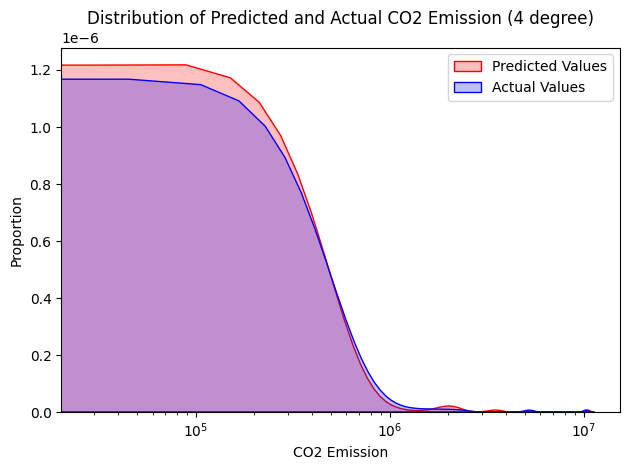

In [37]:
sns.kdeplot(x=ypipe_4, fill=True, color='r', label='Predicted Values')
sns.kdeplot(x=df['CO2 emission'], fill=True, color='b', label='Actual Values')

plt.title('Distribution of Predicted and Actual CO2 Emission (4 degree)')
plt.xlabel('CO2 Emission')
plt.ylabel('Proportion')
plt.legend()
plt.xscale('log')
plt.tight_layout()

Діаграми залишків

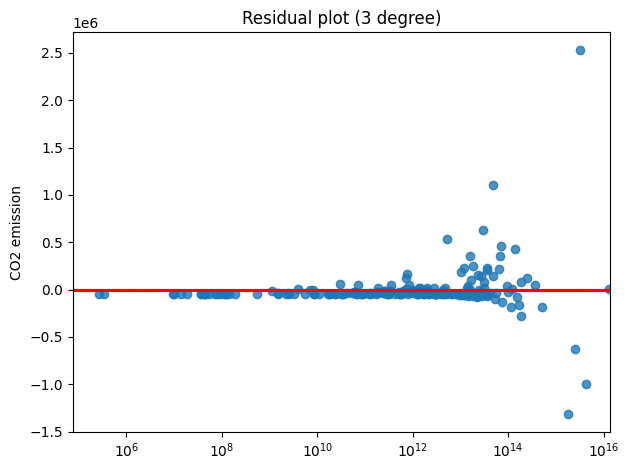

In [58]:
sns.residplot(x=df['Area'] * df['Population'], y=y, lowess=True, line_kws={'color': 'red'}, order=3)
plt.title('Residual plot (3 degree)')
plt.xscale('log')
plt.tight_layout()

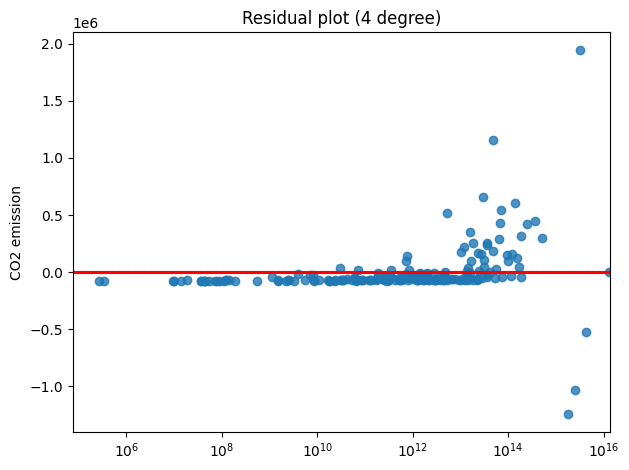

In [59]:
sns.residplot(x=df['Area'] * df['Population'], y=y, lowess=True, line_kws={'color': 'red'}, order=4)
plt.title('Residual plot (4 degree)')
plt.xscale('log')
plt.tight_layout()

3. Оцінювання моделей

Модель **третього** порядку

In [188]:
mse = mean_squared_error(y_true=y, y_pred=ypipe_3)
score = r2_score(y_true=y, y_pred=ypipe_3)

print(f"R-square: {colored(f'{score:.4e}', 'green')}")
print(f"MSE of actual and predicted values: {colored(f'{mse:.4e}', 'blue')}")

R-square: 9.5912e-01
MSE of actual and predicted values: 3.1535e+10


Модель **четвертого** порядку

In [65]:
mse = mean_squared_error(y_true=y, y_pred=ypipe_4)
score = r2_score(y_true=y, y_pred=ypipe_4)

print(f"R-square: {colored(f'{score:.4e}', 'green')}")
print(f"MSE of actual and predicted values: {colored(f'{mse:.4e}', 'blue')}")

R-square: 9.3788e-01
MSE of actual and predicted values: 4.7920e+10


Можна зробити висновки, що множинна поліноміальна модель четвертого порядку є найкращим представником серед усіх інших моделей. З коефіціентом детермінації більше ніж $0.985$ та середньоквадратичною похибкою $1.173 \cdot 10^{10}$